In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


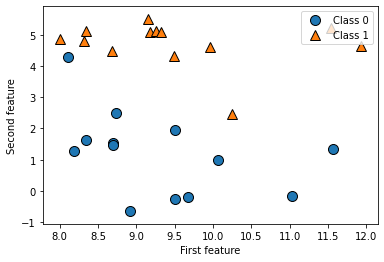

In [2]:
#データセット生成
X, y = mglearn.datasets.make_forge()
#データセットをプロット
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"], loc=1)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

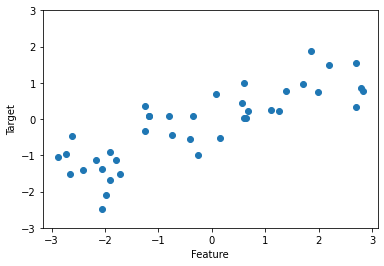

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")


### Cancer

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [6]:
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
print("Feature names:\n{}".format(cancer.feature_names))
#print(cancer.DESCR)

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Boston 

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### KNeighbors

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


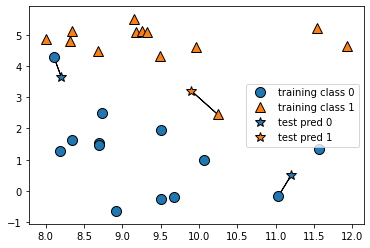

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


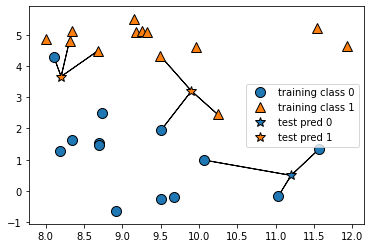

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("Test set predictions:{}".format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]


In [16]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Test set accuracy: 0.86


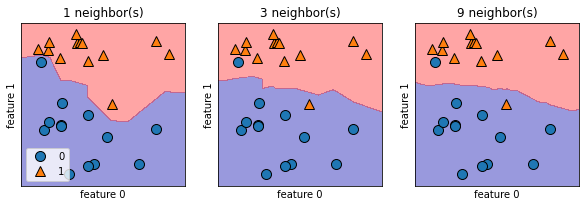

In [17]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    # fitメソッドは自分自身を返すので、1行で
    # インスタンスを生成してFitすることができる。
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

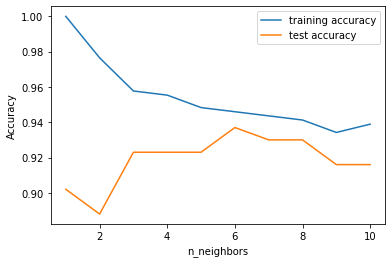

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify =cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # 訓練セット制度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

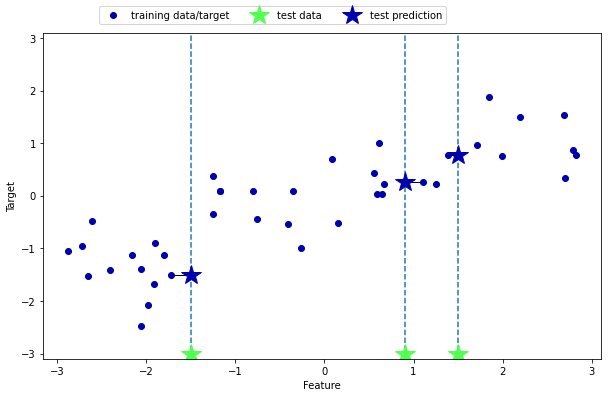

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

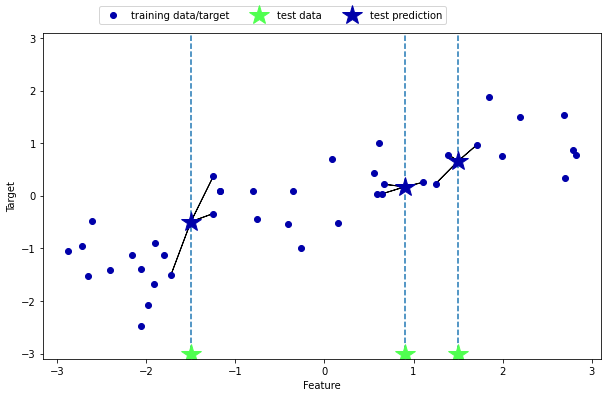

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

# waveデータセットを訓練データセットとテストセットに分類
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近接点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors = 3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
print("Test set R^2: {:.2f}".format(reg.score(X_test,y_test)))

Test set R^2: 0.83


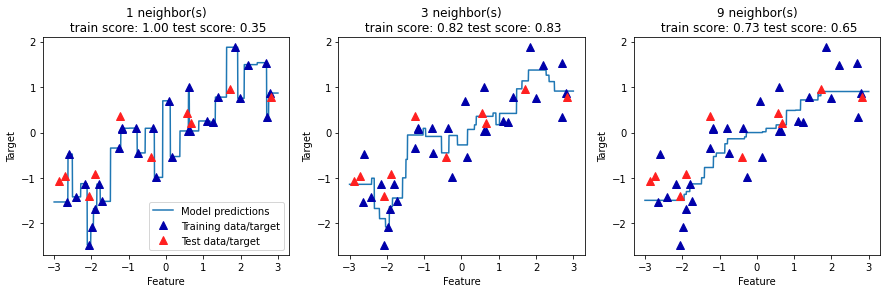

In [27]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
# -3から３までの間に1,000点のデータポイントを作る
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    # 1,3,9近接点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train, '^', c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test, '^', c=mglearn.cm2(1),markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, 
            reg.score(X_train,y_train),
            reg.score(X_test,y_test)
        ))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


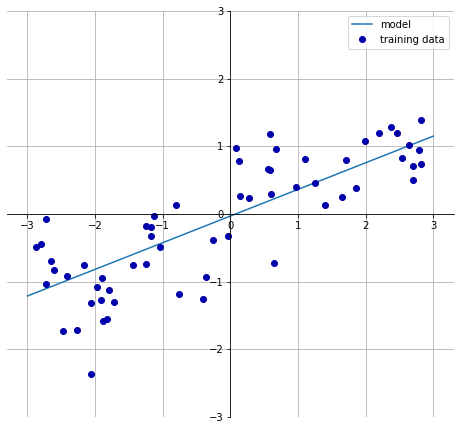

In [28]:
mglearn.plots.plot_linear_regression_wave()

In [31]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [33]:
print("Ir.coef_: {}".format(lr.coef_))
print("lr.intercept_{}".format(lr.intercept_))

Ir.coef_: [0.39390555]
lr.intercept_-0.031804343026759746


In [34]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.67
Test set score: 0.66


In [35]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [36]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.95
Test set score: 0.61


In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.75


In [38]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.64


In [39]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test,y_test)))

Training set score: 0.93
Test set score: 0.77


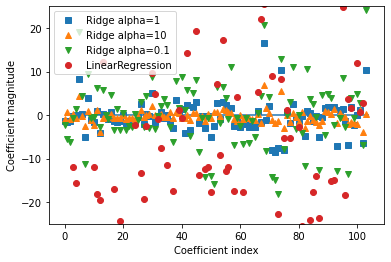

In [41]:
plt.plot(ridge.coef_, 's',label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^',label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_, "o", label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

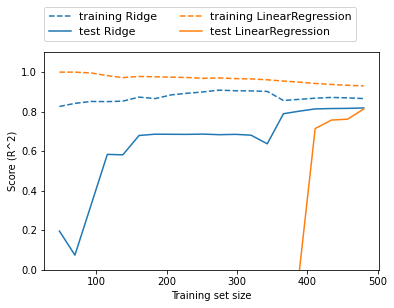

In [42]:
mglearn.plots.plot_ridge_n_samples()

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [44]:
# max_iterの値を増やしている。
# こうしておかないとモデルが,"max_iter"を増やすように警告を発する
lasso001 = Lasso(alpha=0.01,max_iter=10000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [48]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


(-25.0, 25.0)

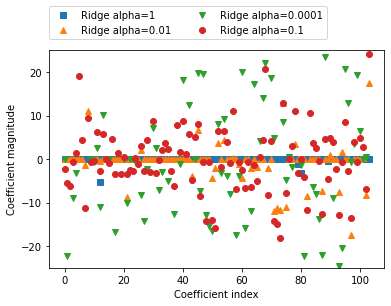

In [50]:
plt.plot(lasso.coef_, 's',label="Ridge alpha=1")
plt.plot(lasso001.coef_, '^',label="Ridge alpha=0.01")
plt.plot(lasso00001.coef_, 'v',label="Ridge alpha=0.0001")

plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0, 1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-25,25)

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


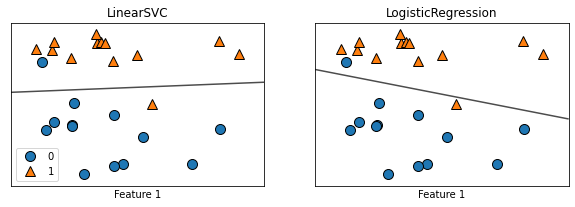

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_xlabel("Feature 1")
axes[0].legend()

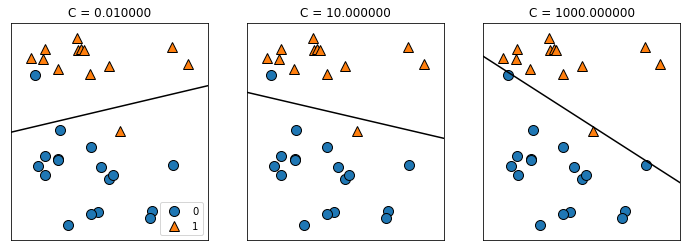

In [59]:
mglearn.plots.plot_linear_svc_regularization()

In [60]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify =cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.944
Test set score: 0.958


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

Training set score: 0.958
Test set score: 0.951


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test,y_test)))

Training set score: 0.934
Test set score: 0.930


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


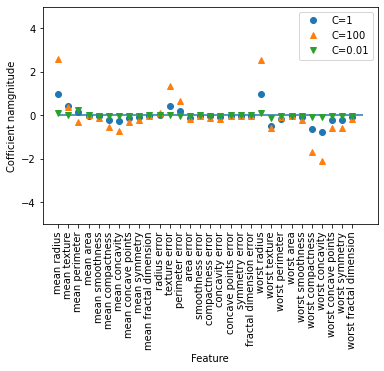

In [64]:
plt.plot(logreg.coef_.T, 'o',label="C=1")
plt.plot(logreg100.coef_.T, '^',label="C=100")
plt.plot(logreg001.coef_.T, 'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Cofficient namgnitude")
plt.legend()

Training accracy of l1 logreg with C=0.001: 0.91
Test accracy of l1 logreg with C=0.001: 0.92


C:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training accracy of l1 logreg with C=1.000: 0.96
Test accracy of l1 logreg with C=1.000: 0.96
Training accracy of l1 logreg with C=100.000: 0.99
Test accracy of l1 logreg with C=100.000: 0.98


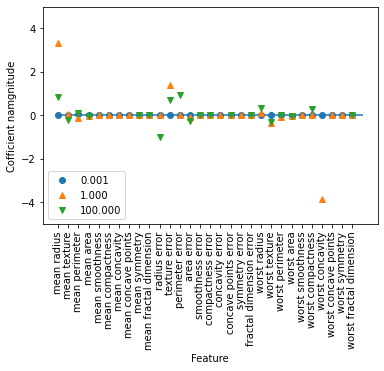

In [69]:
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(C=C,solver='liblinear', penalty="l1").fit(X_train,y_train)
    print("Training accracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train,y_train)))
    print("Test accracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="{:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Cofficient namgnitude")
plt.legend(loc=3)

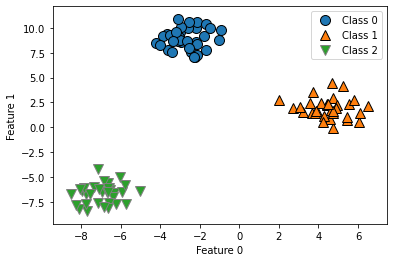

In [70]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

In [73]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape:",linear_svm.coef_.shape)
print("Intercept shape:",linear_svm.intercept_.shape)
print(linear_svm.coef_)

Coefficient shape: (3, 2)
Intercept shape: (3,)
[[-0.17492327  0.23140159]
 [ 0.476216   -0.06937343]
 [-0.18914295 -0.20399652]]


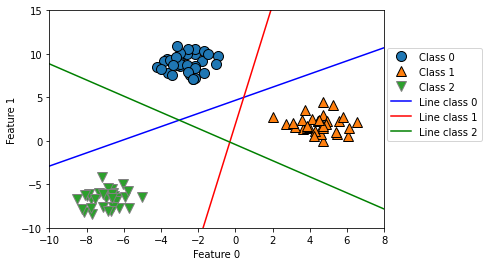

In [78]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b','r','g']):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)

plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.4))

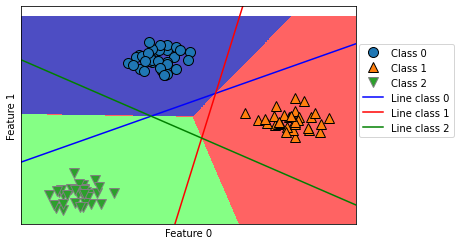

In [80]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b','r','g']):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)

plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.4))